# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Explore The DataSet

In [17]:
df = pd.read_csv("dataSets/segmentation data.csv",index_col = 0)

In [18]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [19]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

We can also apply the describe method to see descriptive statistics about the columns.

In [20]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


df.info() method returns information about the DataFrame including the index data type and columns, non-null values, and memory usage.

We see that there is no missing value in the dataset and all the variables are integer.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


- A good way to get an initial understanding of the relationship between the different variables is to explore how they correlate.
- We calculate the correlation between our variables using corr method in the pandas library.

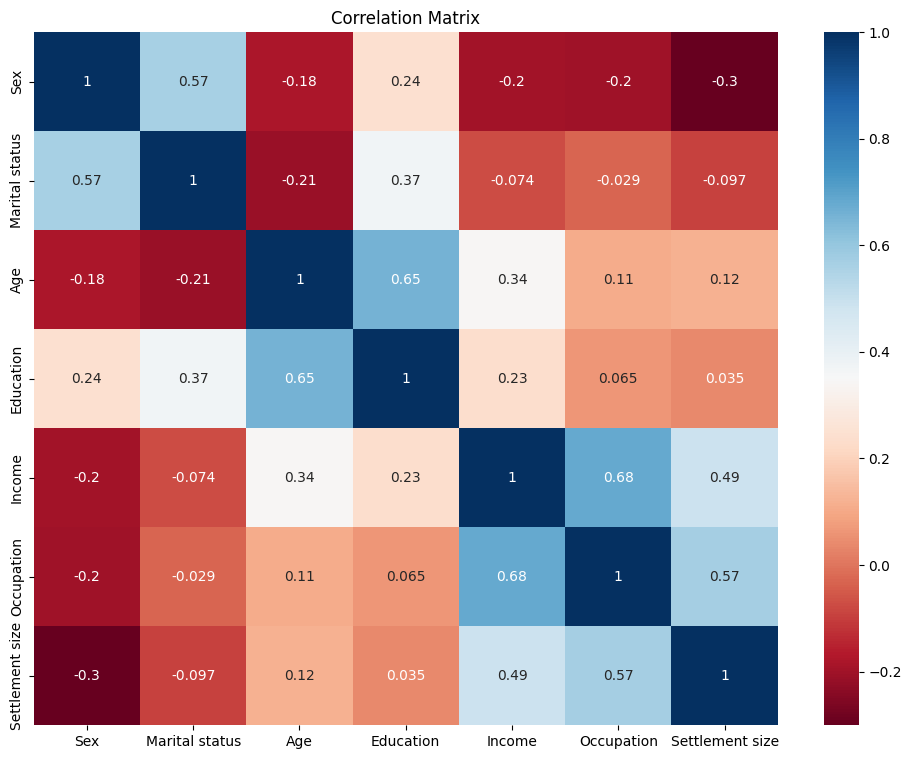

In [27]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.title("Correlation Matrix")
plt.show()

Let’s explore the correlation.

- We see that there is a strong correlation between Education and Age. In other words, older people tend to be more highly educated.

How about income and occupation?

- Their correlation is 0.68. That means If you have a higher salary, you are more likely to have a higher-level occupation such as a manager.

- Correlation matrix is a very useful tool to analyze the relationship between features.

Now, we understand our dataset and have a general idea of it.

Next section will be the segmentation. But before that, we need to scale our data first.

# Data Preprocessing

We need to apply standardization to our features before using any distance-based machine learning model such as K-Means, KNN.

In general, We want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1].

This process is commonly referred to as Standardization.

In [35]:
scaler = StandardScaler()

In [36]:
df_std = scaler.fit_transform(df)

In [40]:
df_std = pd.DataFrame(data = df_std,columns = df.columns)

In [41]:
df_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


# Building Our Segmentation Model

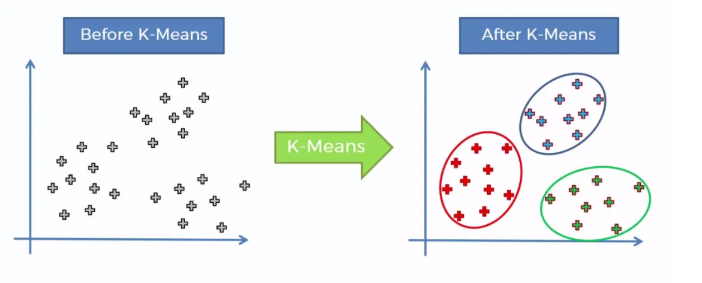

Before applying the K-Means algorithm we need to choose how many clusters we would like to have.

But How?

There are two components. Within Clusters Sum of Squares(WCSS) and Elbow Method.

In [55]:
WCSS = []

k= range(1,11)

for i in k:
    
    model = KMeans(n_clusters=i, init="k-means++",random_state = 42)
    model.fit(df_std)
    WCSS.append(model.inertia_)

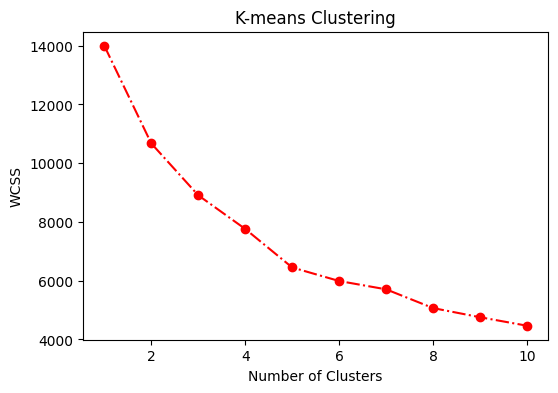

In [56]:
plt.figure(figsize=(6,4))
plt.plot(k,WCSS, color="r", marker="o",linestyle = '-.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

The elbow in the graph is the four-cluster mark. This is the only place until which the graph is steeply declining while smoothing out afterward.

In [57]:
model1 = KMeans(n_clusters=4, init="k-means++",random_state = 42)
model2 = KMeans(n_clusters=5, init="k-means++",random_state = 42)

In [58]:
model1.fit(df_std)
model2.fit(df_std)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


#### We create a new data frame with the original features and add a new column with the assigned clusters for each point.

In [78]:
df_std1= df.copy()
df_std2= df.copy()

In [ ]:
df_std1["Segment K-means"] = model1.labels_
df_std2["Segment K-means"] = model2.labels_

In [80]:
df_std1.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,3
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


In [81]:
df_std2.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,4
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


Let’s group the customers by clusters and see the average values for each variable.

In [86]:
df_segm_analysis = df_std1.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830
1,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349
2,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607
3,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056


Let’s start with the first segment,
- we obeserve low values for education  an average Occupation of 63%. Compared to other clusters, we realize that this is the well-off.

For the second segment, we can say,
- This segment has the lowest values for the annual salary.

- They live almost exclusively in small cities

 -With low income living in small cities, it seems that this is a segment of people with fewer opportunities.

 Let’s carry on with the third segment,
 - This is the youngest segment with an average age of 29. They have medium level of education and average income.
 - They also seem average about every parameter we can label the segment average or standard.
 Finally, we come to the fourth segment,

- It is comprised almost entirely of women, less than 20 percent of whom are in relationships.

- Looking at the numbers, we observe relatively, paired with high values for income and occupation.

- The majority of this segment lives in big cities.

- Let’s label the segment according to their relevance.

In [87]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,0.066543,0.000000,33.240296,0.489834,109932.785582,0.639556,0.611830
fewer-opportunities,0.868254,0.785714,32.928571,1.163492,98466.955556,0.384127,0.006349
standard,0.691099,0.979058,29.060209,1.104712,126838.926702,1.107330,1.324607
career focused,0.149888,0.277405,49.192394,1.467562,160958.722595,1.364653,1.425056


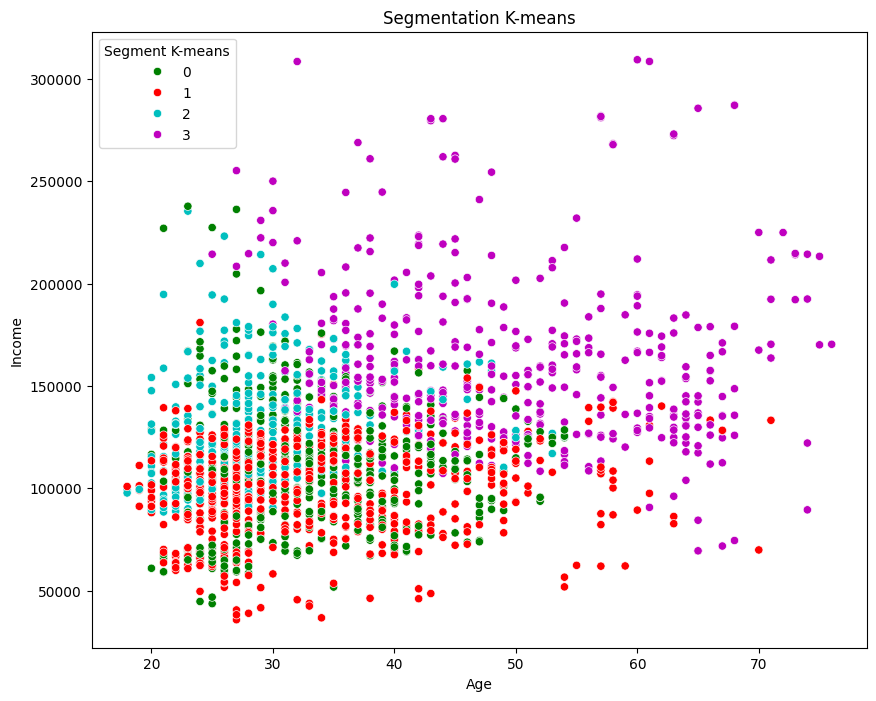

In [94]:
x_axis = df_std1['Age']
y_axis = df_std1['Income']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_std1["Segment K-means"] , palette=['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()


We can see the segment career focused is clearly separated as it is highest in both age and income. But the other three are grouped together.

We can conclude that K-Means did a decent job! However, it’s hard to separate segments from each other.

In the next section, we will combine PCA and K-Means to try to get a better result.

### PCA with K-Means for Better Visualization

What we will do here is apply dimensionality reduction to simplify our problem.

We will choose reasonable components in order to obtain a better clustering solution than with the standard K-Means. So that We aim to see a nice and clear plot for our segmented groups.

In [95]:
pca = PCA()

In [96]:

pca.fit(df_std) 

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [97]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

We observe that the first component explains around 36 % of the variability of the data. The second one is 26 % and so on.

We now can plot the cumulative sum of explained variance.

Text(0, 0.5, 'Cumulative Explained Variance')

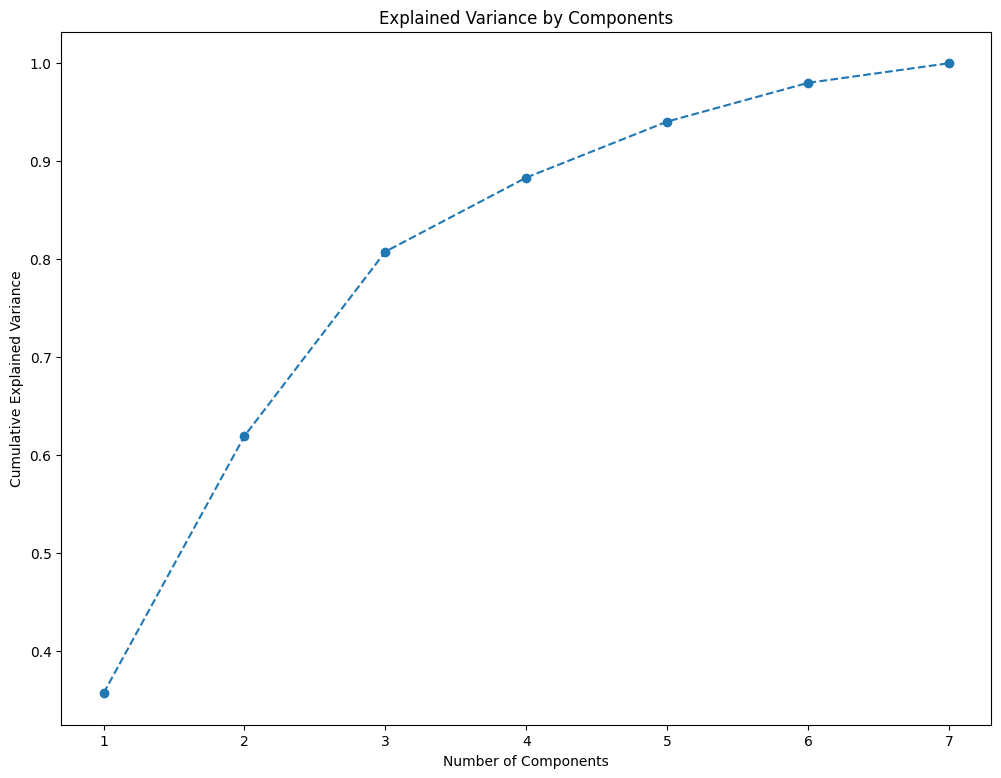

In [98]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Well, How do we choose the right number of components? The answer is there is no right or wrong answer for that.

But, a rule of thumb is to keep at least 70 to 80 percent of the explained variance.

80 % of the variance of the data is explained by the first 3 components. Let’s keep the first 3 components for our further analysis.

In [99]:
pca = PCA(n_components = 3)
pca.fit(df_std)
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

The result is a 3 by 7 array. We reduced our futures to three components from the original seven values that explain the shape the values themselves show the so-called loadings.

Hey, just a minute, what is loading then?

Loadings are correlations between an original variable and the component.

For instance, the first value of the array shows the loading of the first feature on the first component.

Let’s put this information in a pandas data frame so that we can see them nicely. Columns are seven original features and rows are three components that PCA gave us.

In [100]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
              index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


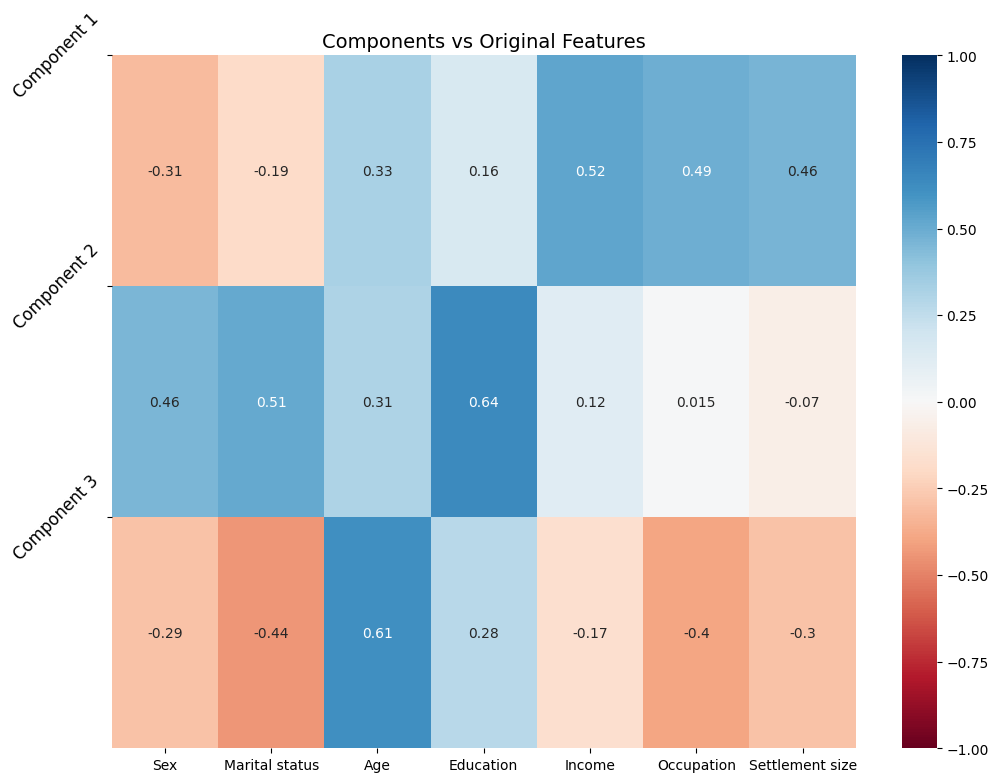

In [101]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

We see that there is a positive correlation between Component1 and Age,Income, Occupation and Settlement size. These are strictly related to the career of a person. So this component shows the career focus of the individual.

For the second component Sex, Marital status and Education are by far the most prominent determinants.

For the final component, we realize that Age, Marital Status, and Occupation are the most important features. We observed that marital status and occupation load negatively but are still important.

Now, we have an idea about our new variables(components). We can clearly see the relationship between components and variables.

Let’s transform our data and save it scores_pca.